In [1]:
import sys,os
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from wgpack.metoc import read_metbuoy
from wgpack.config import DATAPATH,RDRPATH


In [2]:
# read-in WXT data (all files)
LOCALdir = os.path.join(DATAPATH,'mmb')

# List local WXT file names
fnames_local=[]
for root, dirs, files in os.walk(LOCALdir):
    for filename in files:
        if not filename[0] == '.':
            fnames_local.append(filename)

# Read-in WXT mets
path_local = os.path.join(LOCALdir,fnames_local[0])
WXTdf = read_metbuoy(path_local)
for f in fnames_local[1:]:
    path_local = os.path.join(LOCALdir,f)
    WXTdf = pd.concat([WXTdf, read_metbuoy(path_local)])
# sort by date
WXTdf.sort_index(inplace=True)
# convert windspeed from knots to m/s
kt2mps = 0.514444
WXTdf['WindSpeed'] = WXTdf['WindSpeed'] * kt2mps
WXTdf['WindSpeed10'] = WXTdf['WindSpeed10'] * kt2mps

WXTdf

,WindSpeed,WindSpeed10,WindDirection,SLpressure,pressure,temperature,RelativeHumidity,latitude,longitude
Date,,,,,,,,,
2021-04-29 19:32:06,0.771666,0.936288,37.45,NaN,1019.642029,17.2,73.1,32.87527,-117.26330
2021-04-29 19:47:51,1.280966,1.558765,33.62,NaN,1019.642029,17.4,73.1,32.87882,-117.26668
2021-04-29 20:02:24,1.697665,2.073209,334.39,NaN,1019.303390,17.5,72.2,32.87800,-117.26558
2021-04-29 20:17:05,2.680253,3.266719,358.91,NaN,1018.964751,17.5,74.0,32.87718,-117.26989
2021-04-29 20:31:44,1.682232,2.047487,5.56,NaN,1018.964751,17.5,74.3,32.87928,-117.27300
...,...,...,...,...,...,...,...,...,...
2021-06-05 00:26:26,0.802533,0.977444,191.79,1009.51,1009.482859,20.8,60.8,32.84743,-117.24518
2021-06-05 00:43:41,0.421844,0.514444,171.23,1007.48,1007.451025,23.1,54.3,32.87003,-117.25239
2021-06-05 00:59:11,0.370400,0.452711,170.37,1007.81,1007.789664,24.1,50.8,32.87000,-117.25238


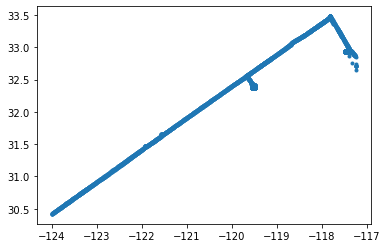

In [4]:
import matplotlib.pyplot as plt
plt.plot(WXTdf['longitude'],WXTdf['latitude'],'.')
